In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize

import scipy.stats as stat
import pylab
from collections import Counter

## Importing the Dataset

In [53]:
# Predict whether a customer will buy the new SUV. 
# This information will later be given to the advertising department to optimize targetting future customers.

df = pd.read_csv("/content/Social_Network_Ads.csv") # Binary Classification
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [54]:
# Length of dataset
len(df)

400

In [55]:
# Datatype of each column 
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

## Checking for missing values

In [56]:
df.isnull().sum()
# No missing values

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Check for outliers - Logistic Regression is sensitive to outliers

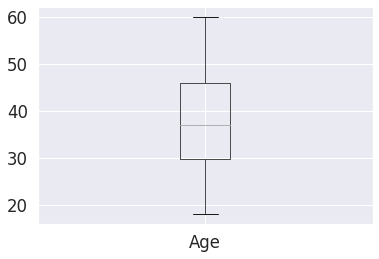

In [57]:
figure = df.boxplot(column="Age")

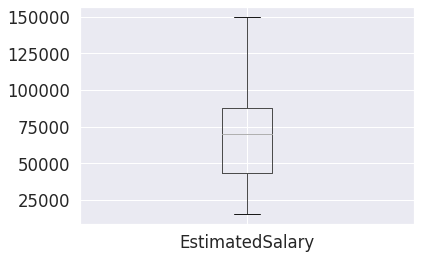

In [58]:
figure = df.boxplot(column="EstimatedSalary")

## Create matrix of features and label

In [59]:
X = df.iloc[:,:-1].values # features
y = df.iloc[:,-1].values # label

# X and y are numpy arrays

In [60]:
X.shape, y.shape

((400, 2), (400,))

## Splitting the dataset into Train and Test Set

In [61]:
from sklearn.model_selection import train_test_split

# Train - 75% data, Test - 25% data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0) # test_size = 0.2 is totally fine

# random_state --> for same split of data

In [62]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((300, 2), (300,), (100, 2), (100,))

## Feature Scaling (not needed)

Feature scaling is not needed for all ML algorithms. Only for some.

**It is not needed for logistic regression**

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Logistic Regression model on Training set

In [64]:
from sklearn.linear_model import LogisticRegression # class

classifier = LogisticRegression() # object, i.e. create the model

# Train the model on training set
classifier.fit(X_train,y_train) # Fit parameters on hypothesis function 

# check what the parameters mean by checking out Sklearn documentation

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicitng a new result

Age = 30, Expected salary = $87,000
Yes or No? To buy SUV

In [65]:
# predict() --> direct prediction
# predict_proba() --> probability

pred = classifier.predict([[30, 87000]]) # input must be a 2D matrix
pred
# If feature was scaled (though not needed here), classifier.predict(sc.transform([[30, 87000]]))

array([1])

In [66]:
pred_prob = classifier.predict_proba([[30, 87000]])
pred_prob

# probabilty of 0 > 1, so final answer is 0

array([[0., 1.]])

## Predicting the Test results - Evaluating the model

In [67]:
# Test set --> evaluate model on new observations (future data)

# Input the features to predict the label(estimated), returns a vector(matrix)
y_pred = classifier.predict(X_test)

In [68]:
# Concatenate the 2 vectors (Compare two numerical vectors - estimated and true)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# reshape vector from horizantal to vertical
# axis = 1 for vertical concatenation

# first column --> predicted label (test set), second column --> true label (real ones - train set)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


### Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

## Confusion Matrix

The next way to evaluate a classification model is by using a [confusion matrix.](https://en.wikipedia.org/wiki/Confusion_matrix)

A confusion matrix is a quick way to compare estimated labels with actual labels. In essence, giving you an idea of where the model is getting confused.

In [69]:
from sklearn.metrics import confusion_matrix 

y_pred = classifier.predict(X_test)

confuse_matrix = confusion_matrix(y_test,y_pred) # compare actual labels (test) with predicted labels
confuse_matrix

array([[65,  3],
       [ 8, 24]])

A BETTER visual way is with Seaborn's [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) plot.

In [70]:
# Function to plot confusion matrix using Seaborn's heatmap()

def plot_confusion_matrix(confuse_matrix):
  fig,ax = plt.subplots(figsize=(8,6))

  # Set the font scale
  sns.set(font_scale=1.5)

  ax = sns.heatmap(
      confuse_matrix,
      annot=True, # Annote the boxes
      cbar=False
  )

  plt.xlabel("Predicted label")
  plt.ylabel("True label")

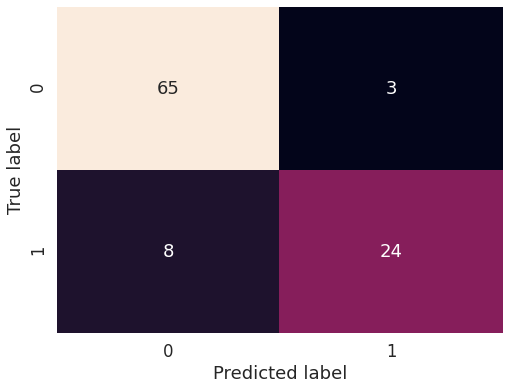

In [71]:
plot_confusion_matrix(confuse_matrix)

In [72]:
# when predict = 0 and actual = 0, we have 65 samples (correct sammples)
# when predict = 1 and actual = 1, we have 24 samples (correct sammples)

# false +ve --> when predict = 1 and actual = 0
# false -ve --> when predict = 0 and actual = 1
# so, model is getting confused in false +ve and false -ve

For clarity: (predict target vs true target)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.89

## Classification Report

A classification report is a collection of metrics.

create a classification report using Scikit-Learn's [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



It returns four columns: precision, recall, f1-score and support.

Each term measures something slightly different:

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

**When should you use each?**

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

## Visualize the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


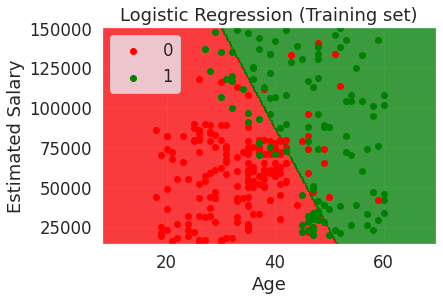

In [75]:
# x axis --> 1st feature (Age), y axis --> 2nd feature (Expected salary)
# each points corresponds to a single sample

# we will plot a decision boundary - a linear classifier
# code is pretty much advanced -- only useful for training purposes (no need to understand that much)

from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train # Train set

# create a grid of ranges, step = 0.25 --> dense grid
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# green - 1, red - 0
# apply predict method on each dense point in the grid
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualize the Test Set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


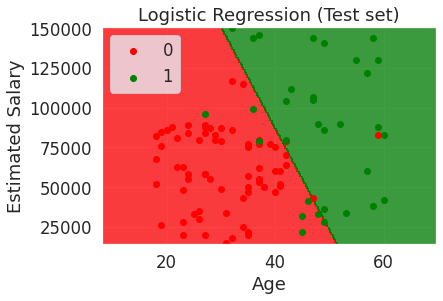

In [76]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test # Test set (new, unseen samples)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# There are still some incorrect predictions using decision boundary (linear classifier)

# So we will use a stronger classification algorithm (non-linear classifiers), i.e. a prediction curve